In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import dataset as dataset
import datapreparation as datp
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import copy
import importlib
import GRU as gru

In [2]:
#reload imports
importlib.reload(datp)
importlib.reload(gru)
neuraldir = os.path.abspath(os.path.join(os.curdir, os.pardir))
data = dataset.pianoroll_dataset_batch(neuraldir+'\\datasets\\training\\voicesonly\\piano_roll_fs_1')
print(data.tags[0])
print(torch.cuda.is_available())

AC-06-Nun-1.csv
True


In [32]:
## Initialize Generalist
## Generalist(input_size, hidden_size, num_tags)
model_generalist = gru.Generalist(128, 256, int(data.num_tags()))
model_generalist.optimizer = torch.optim.Adam(model_generalist.parameters(), lr=5e-04)
model_generalist.loss_log = []

In [ ]:
## Train the generalist
num_epochs = 2000
## Returns state for transferred training
state = gru.train_sequence(model_generalist, num_epochs, data, model_generalist.optimizer, model_generalist.loss_log)

In [13]:
## Save the Generalist state
dir_path = os.path.dirname(os.path.realpath(gru.__file__))
torch.save(state, dir_path+'\\Chorals2.pt')

## Current best state 1000 epochs, 256 hidden_size.

In [5]:
## Print Generalist state
print('Total number of epochs run: ', len(model_generalist.loss_log))
print('Epoch number of lowest loss: ', model_generalist.loss_log.index(min(model_generalist.loss_log)))
print('Loss for best epoch', min(model_generalist.loss_log))

Total number of epochs run:  2000
Epoch number of lowest loss:  1378
Loss for best epoch 109.67068357020617


In [33]:
## Load saved weights into Generalist model
# OLD BACKUP: NOT CHORALS
#model_generalist.optimizer = gru.load(model_generalist, filename='Generalist.pt')

# CHORALS
model_generalist, model_generalist.optimizer = gru.load(model_generalist, filename='Chorals.pt')



CUDA


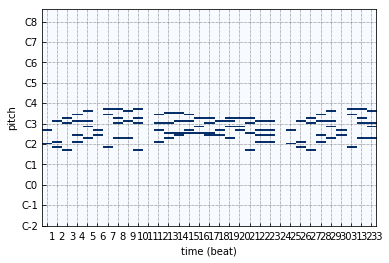

In [7]:
## Generate Generalist music
embed, matrix, song_raw = gru.gen_music_seconds_smooth(model_generalist, data[0][0] ,composer=0,fs=1,gen_seconds=32,init_seconds=32, device='cpu')
embed

#roll = matrix.astype(int)
#empty = np.zeros(len(roll[0]), int)
#new = np.vstack((empty, roll))



#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

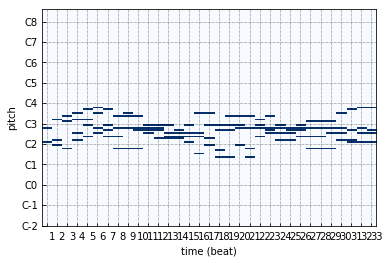

C:/DeepLearning/Master/results/neuralnet/AC-06-Nun-nn.mid


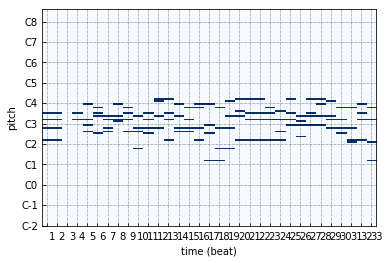

C:/DeepLearning/Master/results/neuralnet/AC-11-Wann-nn.mid


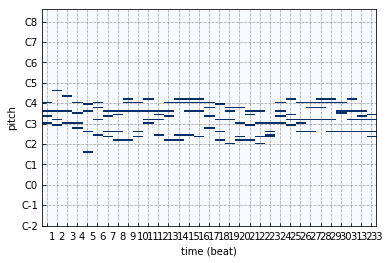

C:/DeepLearning/Master/results/neuralnet/C137-5-Lobe-nn.mid


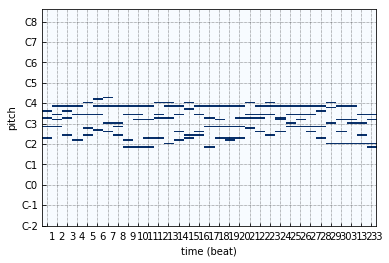

C:/DeepLearning/Master/results/neuralnet/C140-7-Gloria-nn.mid


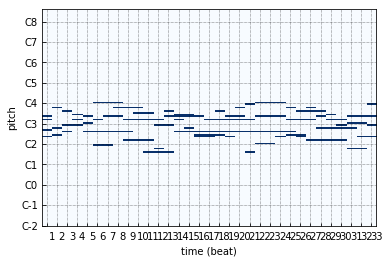

C:/DeepLearning/Master/results/neuralnet/CO-05-fitly-nn.mid


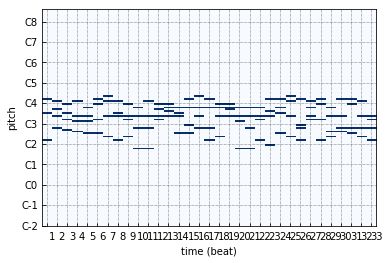

C:/DeepLearning/Master/results/neuralnet/CO-09-jesus-nn.mid


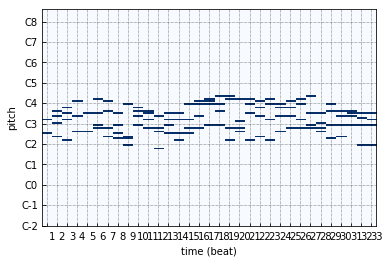

C:/DeepLearning/Master/results/neuralnet/CO-12-break-nn.mid


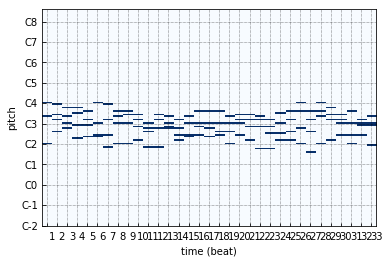

C:/DeepLearning/Master/results/neuralnet/CO-17-gloom-nn.mid


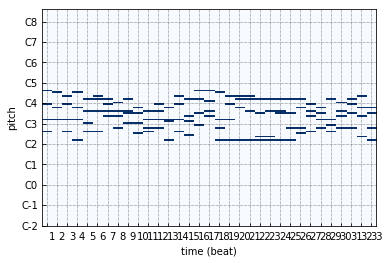

C:/DeepLearning/Master/results/neuralnet/CO-23-hosts-nn.mid


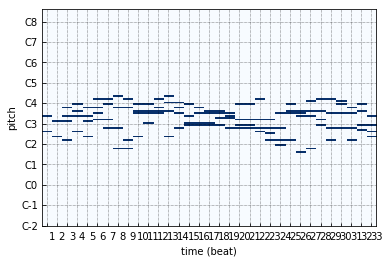

C:/DeepLearning/Master/results/neuralnet/CO-28-lord-nn.mid


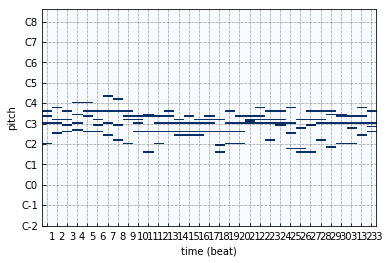

C:/DeepLearning/Master/results/neuralnet/CO-33-thee-nn.mid


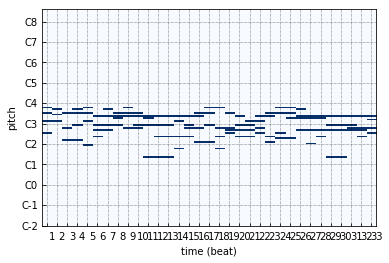

C:/DeepLearning/Master/results/neuralnet/CO-35-rejoi-nn.mid


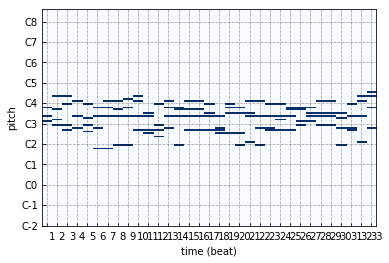

C:/DeepLearning/Master/results/neuralnet/CO-46-alldk-nn.mid


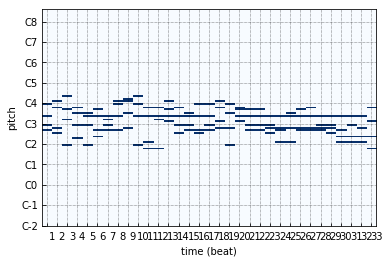

C:/DeepLearning/Master/results/neuralnet/CO-53-heart-nn.mid


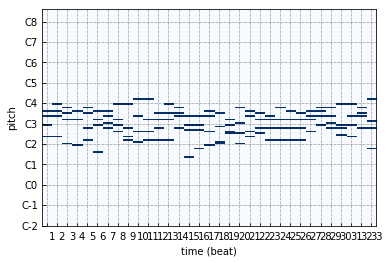

C:/DeepLearning/Master/results/neuralnet/CO-59-besid-nn.mid


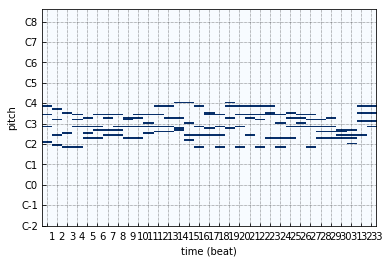

C:/DeepLearning/Master/results/neuralnet/M3-01-Jesu-nn.mid


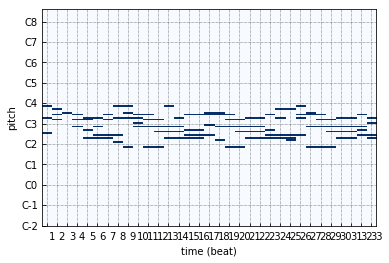

C:/DeepLearning/Master/results/neuralnet/M3-07-Weg-nn.mid


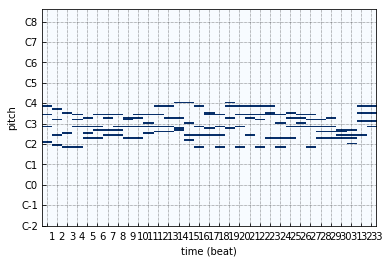

C:/DeepLearning/Master/results/neuralnet/M3-11-Weich-nn.mid


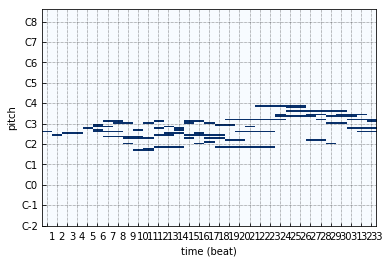

C:/DeepLearning/Master/results/neuralnet/MBM-03-kyrie-nn.mid


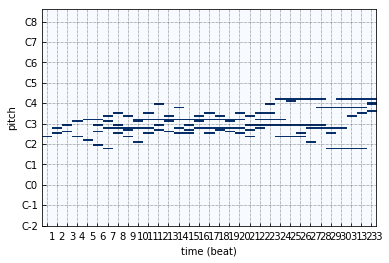

C:/DeepLearning/Master/results/neuralnet/MBM-06-grati-nn.mid


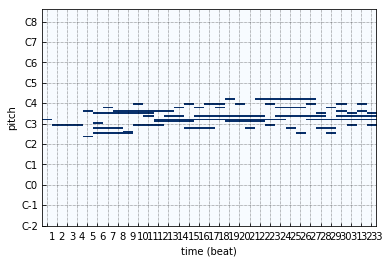

C:/DeepLearning/Master/results/neuralnet/MBM-08-quitl-nn.mid


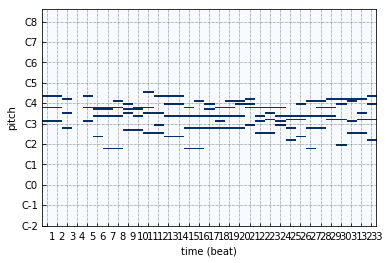

C:/DeepLearning/Master/results/neuralnet/MBM-13-patrm-nn.mid


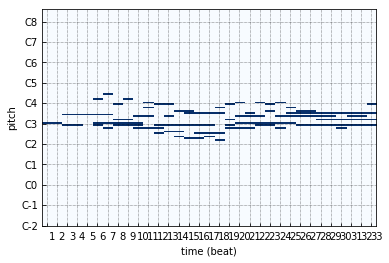

C:/DeepLearning/Master/results/neuralnet/MBM-16-cruci-nn.mid


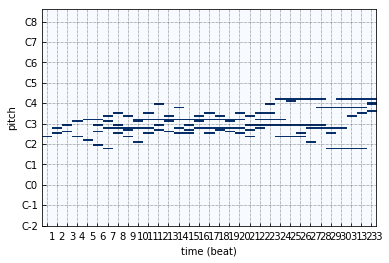

C:/DeepLearning/Master/results/neuralnet/MBM-24-pacem-nn.mid


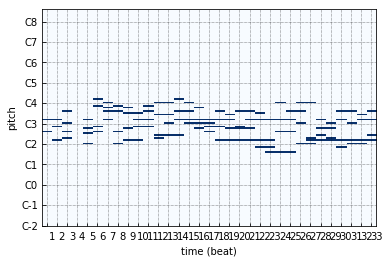

C:/DeepLearning/Master/results/neuralnet/SJP-07-love-nn.mid


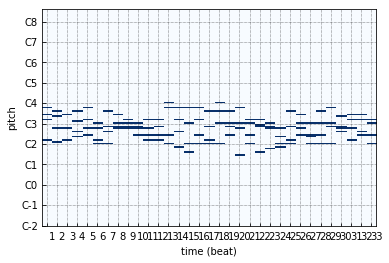

C:/DeepLearning/Master/results/neuralnet/SJP-09-will-nn.mid


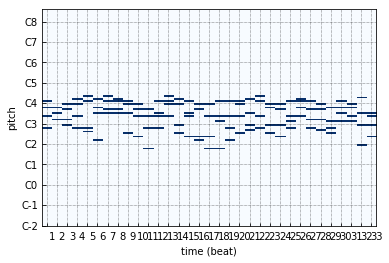

C:/DeepLearning/Master/results/neuralnet/SJP-15-hatrd-nn.mid


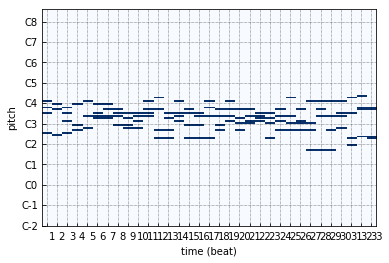

C:/DeepLearning/Master/results/neuralnet/SJP-20-peter-nn.mid


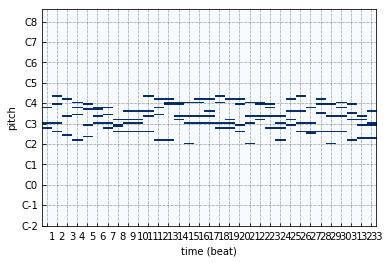

C:/DeepLearning/Master/results/neuralnet/SJP-21-life-nn.mid


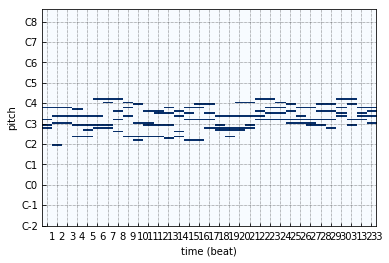

C:/DeepLearning/Master/results/neuralnet/SJP-27-king-nn.mid


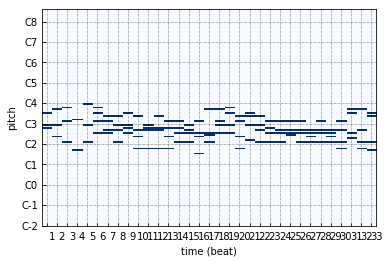

C:/DeepLearning/Master/results/neuralnet/SJP-40-fetrs-nn.mid


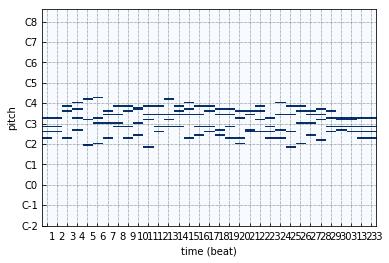

C:/DeepLearning/Master/results/neuralnet/SJP-52-name-nn.mid


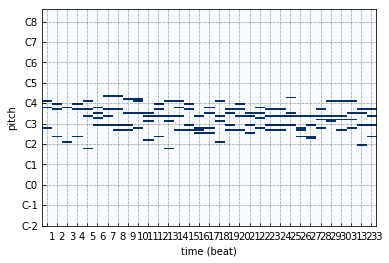

C:/DeepLearning/Master/results/neuralnet/SJP-56-right-nn.mid


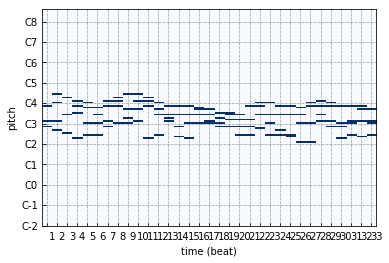

C:/DeepLearning/Master/results/neuralnet/SJP-65-help-nn.mid


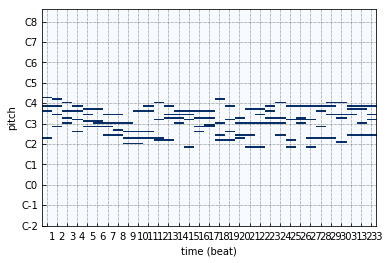

C:/DeepLearning/Master/results/neuralnet/SJP-68-lord-nn.mid


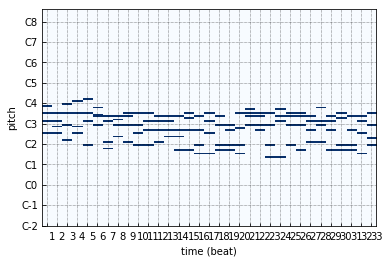

C:/DeepLearning/Master/results/neuralnet/SMP-03-chorl-nn.mid


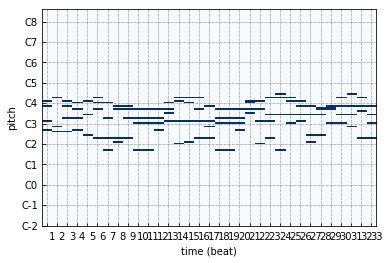

C:/DeepLearning/Master/results/neuralnet/SMP-16-chorl-nn.mid


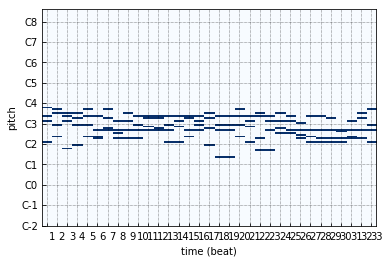

C:/DeepLearning/Master/results/neuralnet/SMP-21-chorl-nn.mid


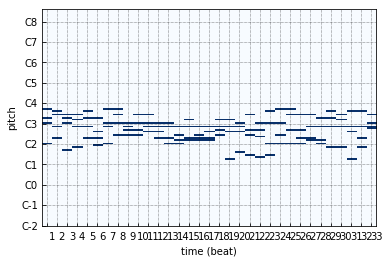

C:/DeepLearning/Master/results/neuralnet/SMP-23-chorl-nn.mid


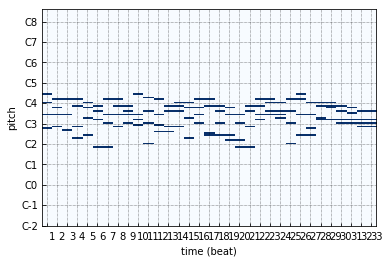

C:/DeepLearning/Master/results/neuralnet/SMP-38-chor-nn.mid


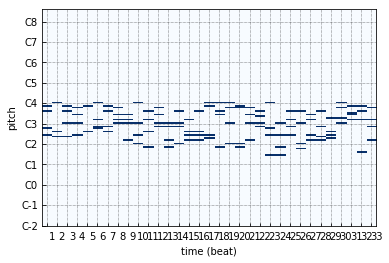

C:/DeepLearning/Master/results/neuralnet/SMP-44-chorl-nn.mid


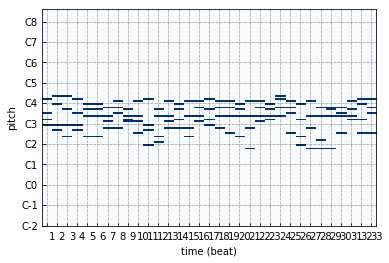

C:/DeepLearning/Master/results/neuralnet/SMP-48-chorl-nn.mid


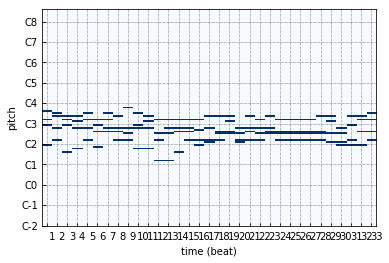

C:/DeepLearning/Master/results/neuralnet/SMP-53-chorl-nn.mid


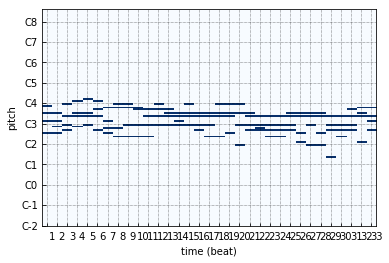

C:/DeepLearning/Master/results/neuralnet/SMP-55-chorl-nn.mid


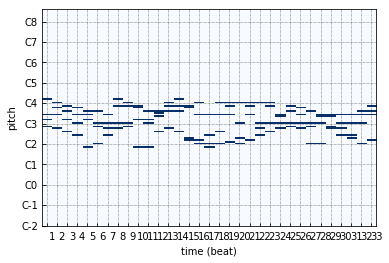

C:/DeepLearning/Master/results/neuralnet/SMP-63-chorl-nn.mid


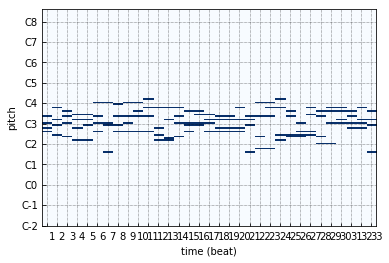

C:/DeepLearning/Master/results/neuralnet/SMP-72-chorl-nn.mid


In [51]:
## Generate 46 example snippets of 32 seconds each

for i in range(0, 46):
    
    embed, matrix, song_raw = gru.gen_music_seconds_smooth(model_generalist, data[i*13+6][0] ,composer=0,fs=1,gen_seconds=32,init_seconds=5, device='cpu')
    fname = str(data.tags[i*13+6][:-4]) + "-nn"
    #fname = "neuralnet-" + str(i*13+6)
    roll = matrix.astype(int)
    empty = np.zeros(len(roll[0]), int)
    new = np.vstack((empty, roll))
    np.savetxt("../../results/neuralnet/pianoroll/" + fname + ".csv", new, fmt='%i', delimiter=",")

    matrix *= 100
    datp.piano_roll_to_mid_file(matrix,"C:/DeepLearning/Master/results/neuralnet/"+fname+".mid",1,4)
    embed

    
#for i, tag in enumerate(data.tags):
    #print(str(i) + " " + str(tag))

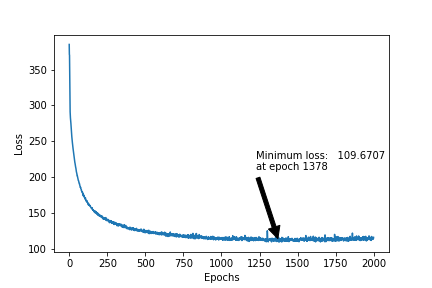

In [150]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

#plt.figure(figsize=(20,20))
plt.plot(model_generalist.loss_log)
plt.ylabel("Loss")
plt.xlabel("Epochs")

min_loss = min(model_generalist.loss_log)
min_pos = model_generalist.loss_log.index(min_loss)

plt.annotate("Minimum loss: " + "{:10.4f}".format(min_loss) +"\nat epoch " + str(min_pos), xy=(min_pos, min_loss), xytext=(min_pos-150, min_loss+100), arrowprops=dict(facecolor='black', shrink=0.05) )
plt.show()
#plt.savefig('neurallosszoom.png')

# Export pianoroll as CSV

In [108]:
import numpy
roll = matrix.astype(int)
numpy.savetxt("test.csv", roll, fmt='%i', delimiter=",")

# Convert csv to midi

In [109]:
roll *= 100
datp.piano_roll_to_mid_file(roll,"test2.mid",1,1)

'C:\\DeepLearning\\Master\\neuralnet\\helpers\\test2.mid'

In [19]:

#data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\IP\\fourpart\\output")
data2 = dataset.pianoroll_dataset_batch("C:\DeepLearning\Master\\neural-composer-assignement\datasets\\training\\voicesonly")
print(data2[0][0].shape[2])

datp.visualize_piano_roll(data2.data[0],fs=1)
play, matrix = datp.embed_play_v1(data2.data[0],fs=1)
play

#matrix *= 100
#datp.piano_roll_to_mid_file(matrix,"output.mid",1,74) # 16 Organ

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\DeepLearning\\Master\\neural-composer-assignement\\datasets\\training\\voicesonly'

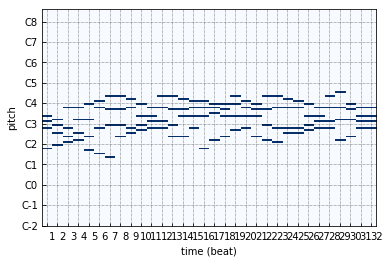

AC-06-Nun-opt
C:/DeepLearning/Master/results/optimizer/AC-06-Nun-opt.mid


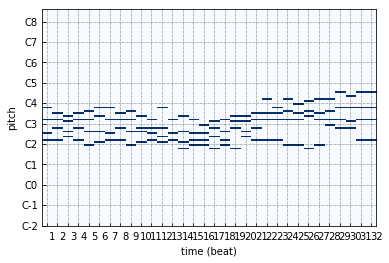

AC-11-Wann-opt
C:/DeepLearning/Master/results/optimizer/AC-11-Wann-opt.mid


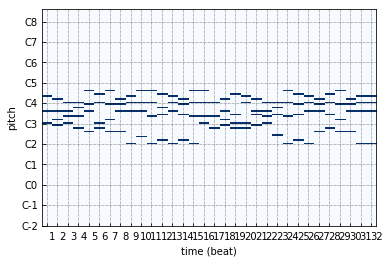

C137-5-Lobe-opt
C:/DeepLearning/Master/results/optimizer/C137-5-Lobe-opt.mid


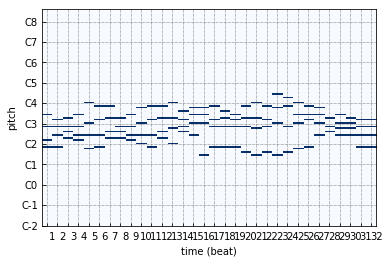

C140-7-Gloria-opt
C:/DeepLearning/Master/results/optimizer/C140-7-Gloria-opt.mid


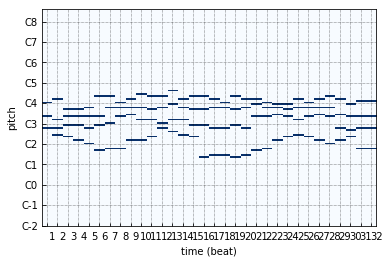

CO-05-fitly-opt
C:/DeepLearning/Master/results/optimizer/CO-05-fitly-opt.mid


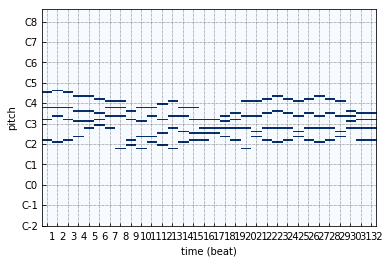

CO-09-jesus-opt
C:/DeepLearning/Master/results/optimizer/CO-09-jesus-opt.mid


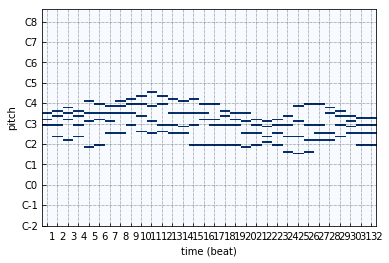

CO-12-break-opt
C:/DeepLearning/Master/results/optimizer/CO-12-break-opt.mid


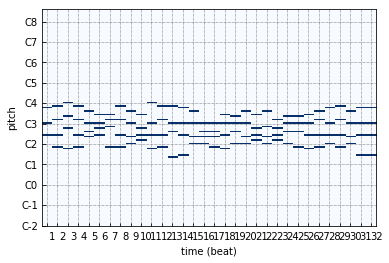

CO-17-gloom-opt
C:/DeepLearning/Master/results/optimizer/CO-17-gloom-opt.mid


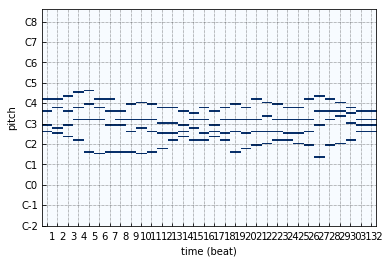

CO-23-hosts-opt
C:/DeepLearning/Master/results/optimizer/CO-23-hosts-opt.mid


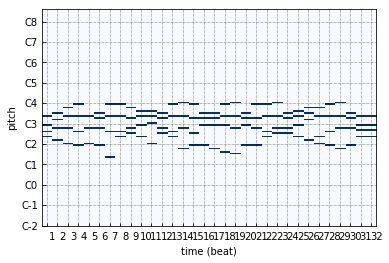

CO-28-lord-opt
C:/DeepLearning/Master/results/optimizer/CO-28-lord-opt.mid


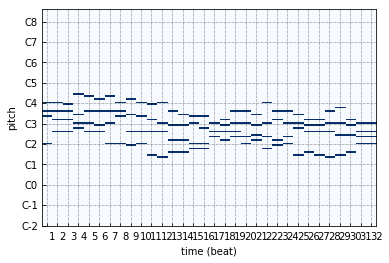

CO-33-thee-opt
C:/DeepLearning/Master/results/optimizer/CO-33-thee-opt.mid


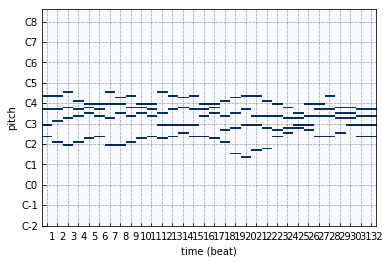

CO-35-rejoi-opt
C:/DeepLearning/Master/results/optimizer/CO-35-rejoi-opt.mid


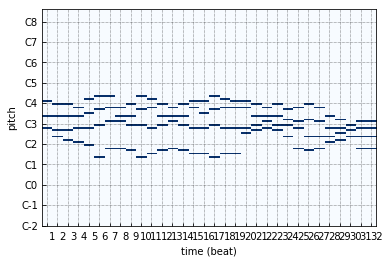

CO-46-alldk-opt
C:/DeepLearning/Master/results/optimizer/CO-46-alldk-opt.mid


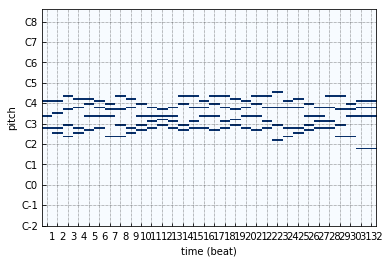

CO-53-heart-opt
C:/DeepLearning/Master/results/optimizer/CO-53-heart-opt.mid


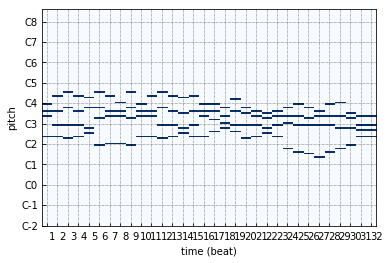

CO-59-besid-opt
C:/DeepLearning/Master/results/optimizer/CO-59-besid-opt.mid


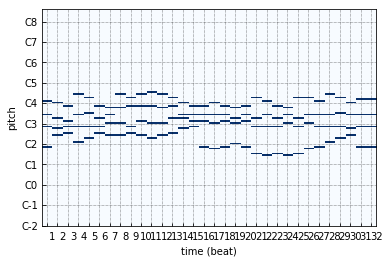

M3-01-Jesu-opt
C:/DeepLearning/Master/results/optimizer/M3-01-Jesu-opt.mid


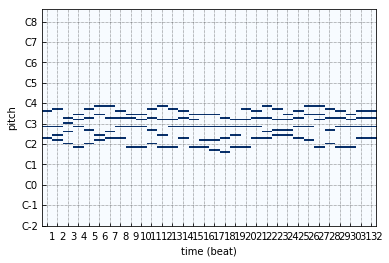

M3-07-Weg-opt
C:/DeepLearning/Master/results/optimizer/M3-07-Weg-opt.mid


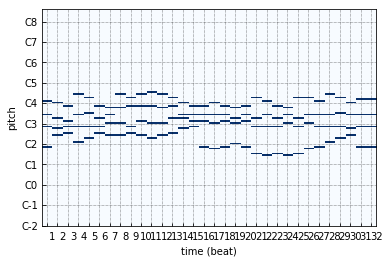

M3-11-Weich-opt
C:/DeepLearning/Master/results/optimizer/M3-11-Weich-opt.mid


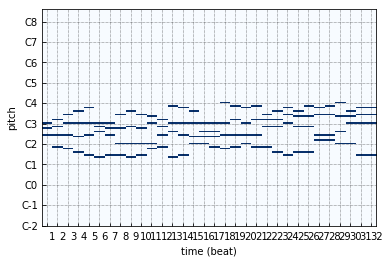

MBM-03-kyrie-opt
C:/DeepLearning/Master/results/optimizer/MBM-03-kyrie-opt.mid


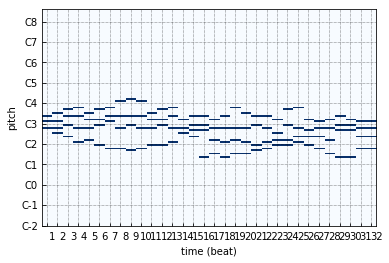

MBM-06-grati-opt
C:/DeepLearning/Master/results/optimizer/MBM-06-grati-opt.mid


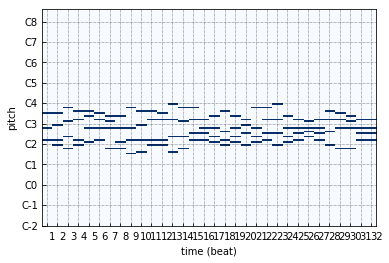

MBM-08-quitl-opt
C:/DeepLearning/Master/results/optimizer/MBM-08-quitl-opt.mid


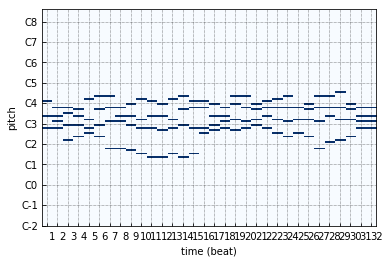

MBM-13-patrm-opt
C:/DeepLearning/Master/results/optimizer/MBM-13-patrm-opt.mid


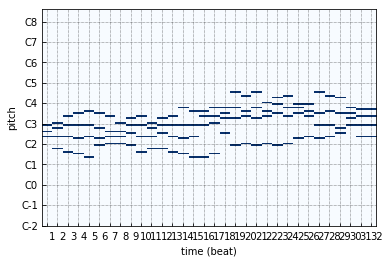

MBM-16-cruci-opt
C:/DeepLearning/Master/results/optimizer/MBM-16-cruci-opt.mid


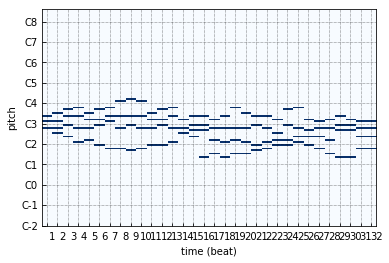

MBM-24-pacem-opt
C:/DeepLearning/Master/results/optimizer/MBM-24-pacem-opt.mid


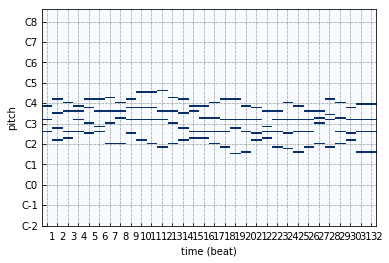

SJP-07-love-opt
C:/DeepLearning/Master/results/optimizer/SJP-07-love-opt.mid


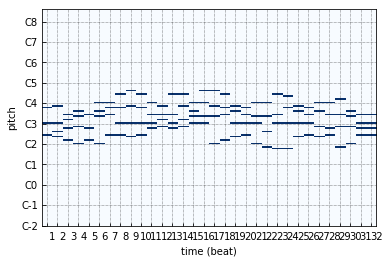

SJP-09-will-opt
C:/DeepLearning/Master/results/optimizer/SJP-09-will-opt.mid


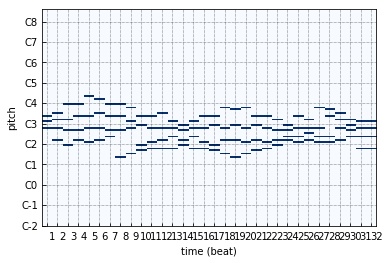

SJP-15-hatrd-opt
C:/DeepLearning/Master/results/optimizer/SJP-15-hatrd-opt.mid


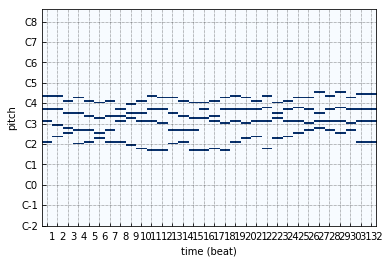

SJP-20-peter-opt
C:/DeepLearning/Master/results/optimizer/SJP-20-peter-opt.mid


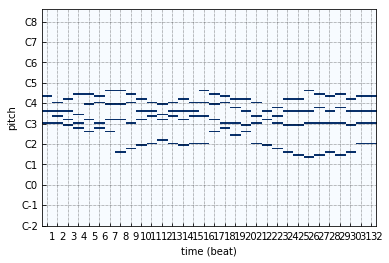

SJP-21-life-opt
C:/DeepLearning/Master/results/optimizer/SJP-21-life-opt.mid


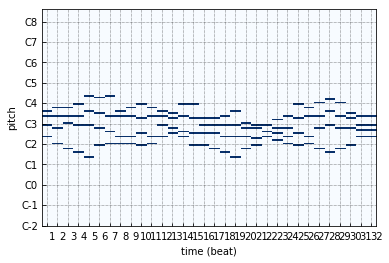

SJP-27-king-opt
C:/DeepLearning/Master/results/optimizer/SJP-27-king-opt.mid


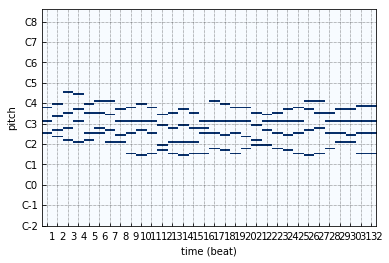

SJP-40-fetrs-opt
C:/DeepLearning/Master/results/optimizer/SJP-40-fetrs-opt.mid


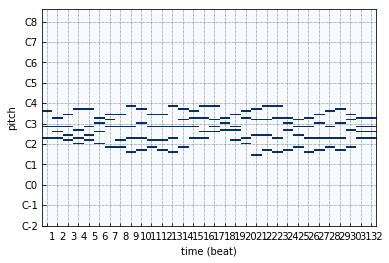

SJP-52-name-opt
C:/DeepLearning/Master/results/optimizer/SJP-52-name-opt.mid


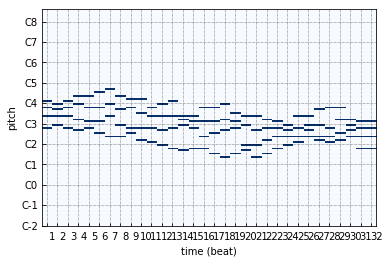

SJP-56-right-opt
C:/DeepLearning/Master/results/optimizer/SJP-56-right-opt.mid


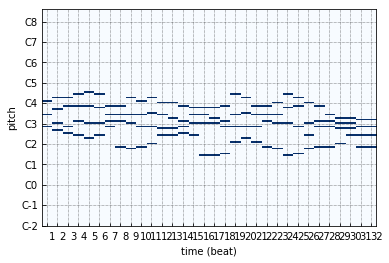

SJP-65-help-opt
C:/DeepLearning/Master/results/optimizer/SJP-65-help-opt.mid


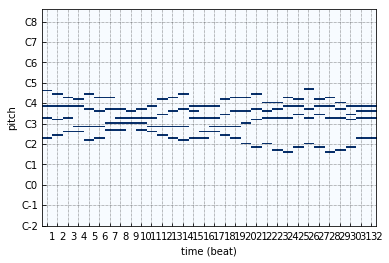

SJP-68-lord-opt
C:/DeepLearning/Master/results/optimizer/SJP-68-lord-opt.mid


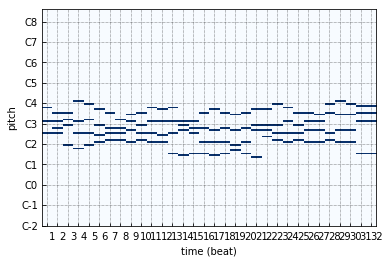

SMP-03-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-03-chorl-opt.mid


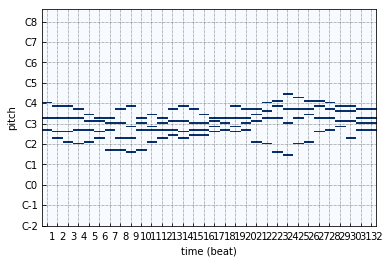

SMP-16-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-16-chorl-opt.mid


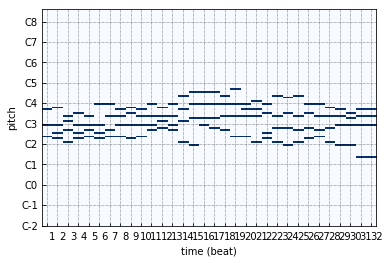

SMP-21-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-21-chorl-opt.mid


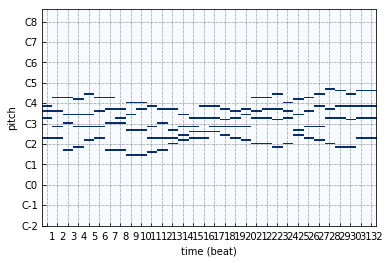

SMP-23-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-23-chorl-opt.mid


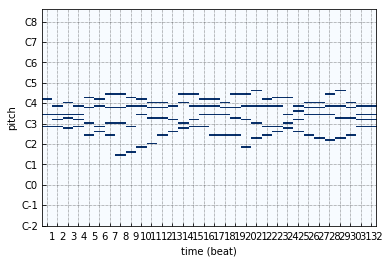

SMP-38-chor-opt
C:/DeepLearning/Master/results/optimizer/SMP-38-chor-opt.mid


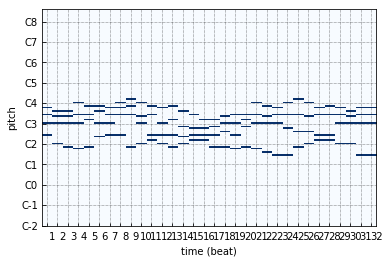

SMP-44-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-44-chorl-opt.mid


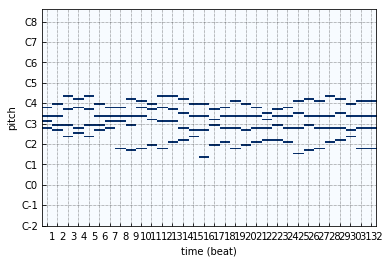

SMP-48-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-48-chorl-opt.mid


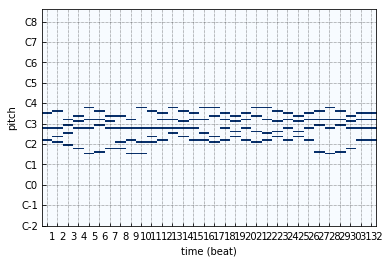

SMP-53-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-53-chorl-opt.mid


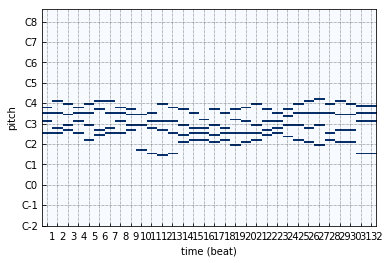

SMP-55-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-55-chorl-opt.mid


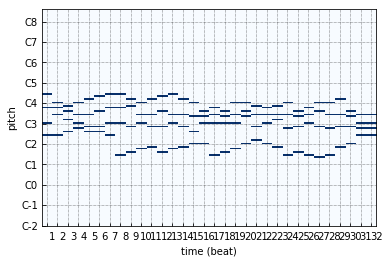

SMP-63-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-63-chorl-opt.mid


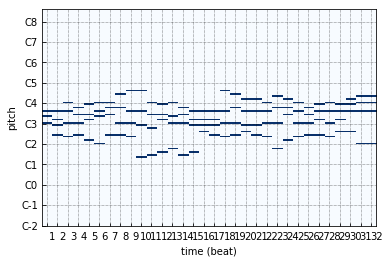

SMP-72-chorl-opt
C:/DeepLearning/Master/results/optimizer/SMP-72-chorl-opt.mid


In [87]:
for i in range(0, 46):
    data2 = dataset.pianoroll_dataset_batch("C:/DeepLearning/Master/results/optimizer/pianoroll")
    play, matrix, song_raw = datp.embed_play_v1(data2.data[i], 0, fs=1)

    tag = str(data2.tags[i][:-4])
    datp.visualize_piano_roll(data2.data[i],fs=1)
    print(tag)
    matrix *= 70
    datp.piano_roll_to_mid_file(matrix,"C:/DeepLearning/Master/results/optimizer/"+str(tag)+".mid",1,74)

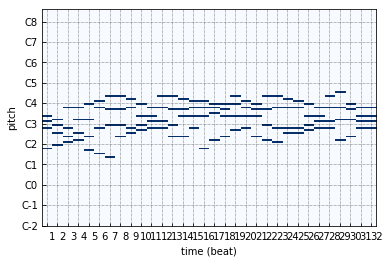

C:/DeepLearning/Master/results/optimizer/AC-06-Nun-opt.mid


'C:/DeepLearning/Master/results/optimizer/AC-06-Nun-opt.mid'

In [85]:
data2 = dataset.pianoroll_dataset_batch("C:/DeepLearning/Master/results/optimizer/pianoroll")
#for j, num in enumerate(data2.tags):
    #print(str(j) + " " + str(data2.tags[j]))
#data2 = dataset.pianoroll_dataset_batch("C:/DeepLearning/Master/results/neuralnet/pianoroll")
#for i in range(0, 46):
datp.visualize_piano_roll(data2.data[0],fs=1)
play, matrix, song_raw = datp.embed_play_v1(data2.data[0], 0, fs=1)
play

#tag = data2.tags[0][:-4]
#print(tag)
#print(data2.tags[0])
matrix *= 70
datp.piano_roll_to_mid_file(matrix,"C:/DeepLearning/Master/results/optimizer/"+str(tag)+".mid",1,74)